In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [8]:
ruta="D:\python\clientes.csv"
df = pd.read_csv(ruta)
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


In [9]:
# Anonimizar el campo dirreccion a traves de la eliminacion
df.drop("direccion", axis=1, inplace=True)
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,62,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,18,0,60281
3,Elizabeth Robinson,21,1,42187
4,Charles Brown,21,1,37589


In [10]:
# Aninimizar el campo edad a través del redondeo
df["edad"] = (df["edad"]//5)*5
df

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,15,0,60281
3,Elizabeth Robinson,20,1,42187
4,Charles Brown,20,1,37589
...,...,...,...,...
195,Barbara Jones,45,0,51931
196,Richard Brown,35,1,47712
197,Mary Garcia,60,1,45261
198,James Wilson,40,1,46787


In [12]:
ruido = np.random.normal(0, 100, size=df["salario"].shape)
df["salario"] += ruido
df
    

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61090.691928
1,James Jones,65,1,53744.492789
2,Patricia Wilson,15,0,60329.089657
3,Elizabeth Robinson,20,1,42014.186572
4,Charles Brown,20,1,37664.916418
...,...,...,...,...
195,Barbara Jones,45,0,51948.662146
196,Richard Brown,35,1,47766.838656
197,Mary Garcia,60,1,45224.987801
198,James Wilson,40,1,46655.131006


In [13]:
for i in range(len(df)):
    df.loc[i, "nombre"] = "Cliente" + str(i)
df.head()

,nombre,edad,categoria,salario
0,Cliente0,60,0,61090.691928
1,Cliente1,65,1,53744.492789
2,Cliente2,15,0,60329.089657
3,Cliente3,20,1,42014.186572
4,Cliente4,20,1,37664.916418


In [16]:
# Balancear los datos de categorias
agrupado = df.groupby("categoria")

df_balanceado = pd.DataFrame()

for nombre, grupo in agrupado:
    grupo_balanceado = resample(
        grupo,
        replace=True,
        n_samples=100,
        random_state=123
    )
    df_balanceado =pd.concat([df_balanceado, grupo_balanceado])

df_balanceado

,nombre,edad,categoria,salario
158,Cliente158,55,0,41564.564355
42,Cliente42,35,0,59559.644706
194,Cliente194,40,0,49930.824866
133,Cliente133,50,0,41760.590291
114,Cliente114,65,0,53474.997865
...,...,...,...,...
179,Cliente179,40,1,54242.806259
80,Cliente80,15,1,56256.820630
93,Cliente93,50,1,49499.456659
156,Cliente156,50,1,47872.787909


[Text(0.5, 1.0, 'Distribucion de las edades con una curva de densidad'),
 Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Frecuencia')]

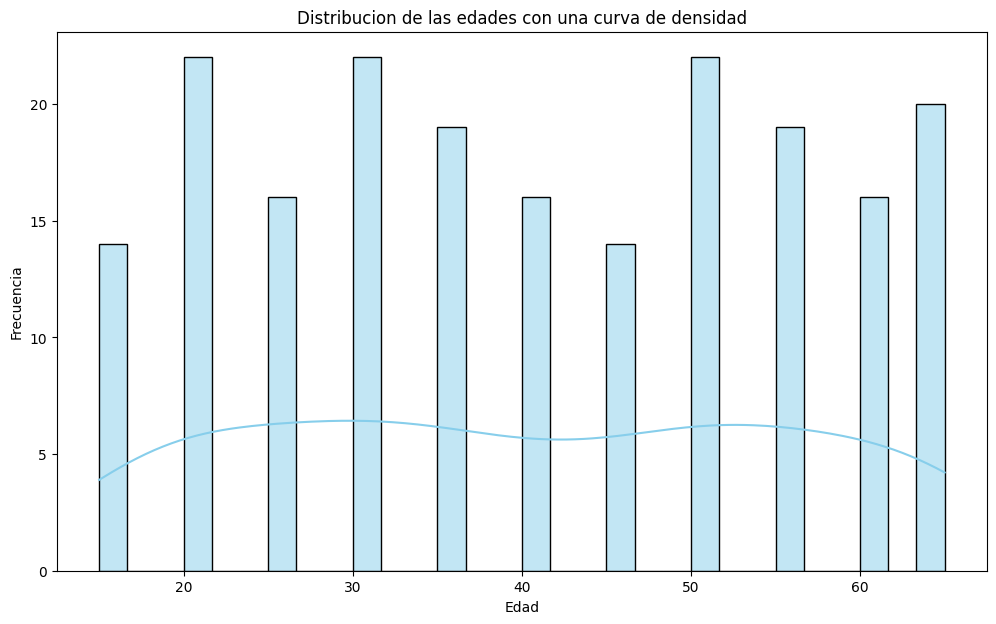

In [19]:
# Vizualisacion 1: Distribucion de las edades con curva de densidad
plt.figure(figsize=(12,7))
ax = sns.histplot(
    df["edad"],
    kde=True,
    color="skyblue",
    bins=30
)

ax.set(
    title="Distribucion de las edades con una curva de densidad",
    xlabel="Edad",
    ylabel="Frecuencia"
)

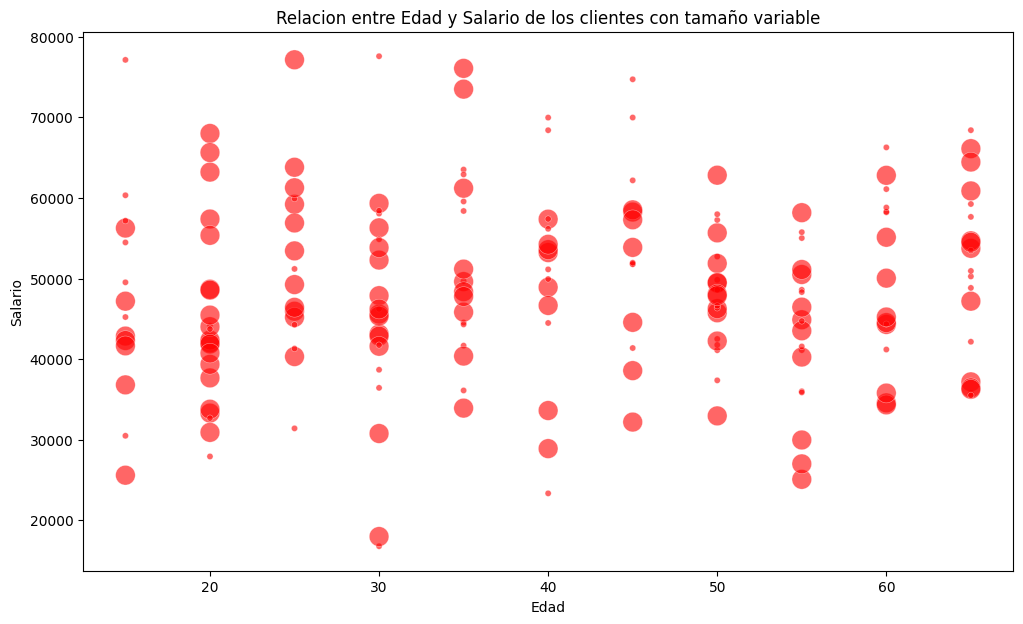

In [23]:
# Visualizacion 2: Relacion entre edad y salario con tamaño variable
plt.figure(figsize=(12,7))
sizes = df["categoria"].replace({0: 50,1:100})
scatter = sns.scatterplot(
    x="edad",
    y="salario",
    size=sizes,
    legend=False,
    sizes=(20,200),
    data=df,
    color="red",
    alpha=0.6
)
scatter.set(
    title="Relacion entre Edad y Salario de los clientes con tamaño variable",
    xlabel="Edad",
    ylabel="Salario"
);


[Text(0.5, 1.0, 'Mapa de calor de correclacion entre variables')]

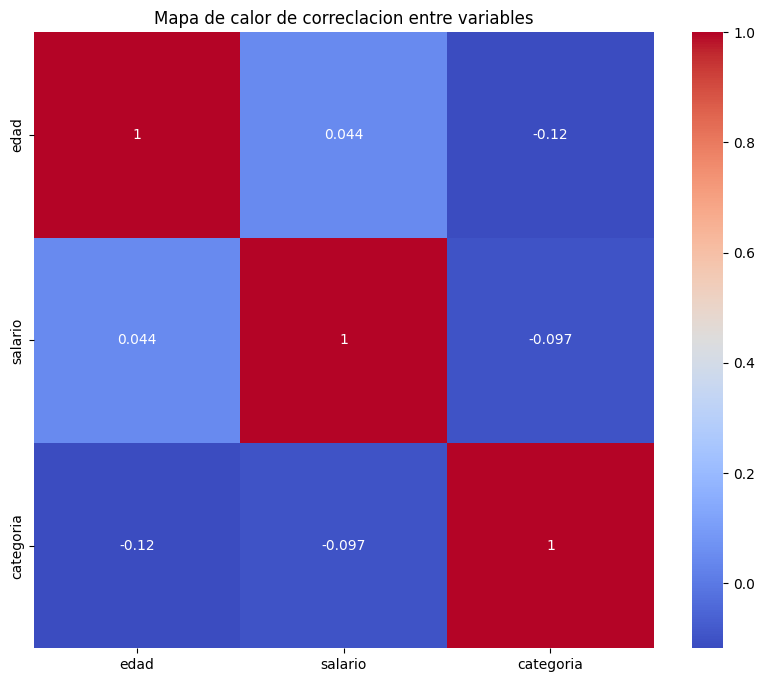

In [24]:
# visualizacion 3: Mapa de calor de correlacion entre variables
plt.figure(figsize=(10,8))
# calculo de la matriz de correlacion
correlation_matrix = df[["edad","salario","categoria"]].corr()
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm"
)

heatmap.set(
    title="Mapa de calor de correclacion entre variables"
)